In [1]:
from interpolation.akima_spline_interpolator import AkimaSplineInterpolator, ExtendedInterpolator
import interpolation.native_linear_interpolator as native
from interpolator_py import LinearInterpolator, Point
import numpy as np
from scipy.interpolate import interp1d
import time
import pandas as pd
from pystat.dataset import PyDataset
import matplotlib.pyplot as plt
import seaborn as sns

Native linear interpolator:
execute_interpolation: 1525.76ms

C++ linear interpolator:
execute_interpolation: 3.18ms

Scipy linear interpolator:
execute_interpolation: 4.44ms

Derivative tests passed successfully.
Integral tests passed successfully.
All test successful, now plotting some interpolated functions. 


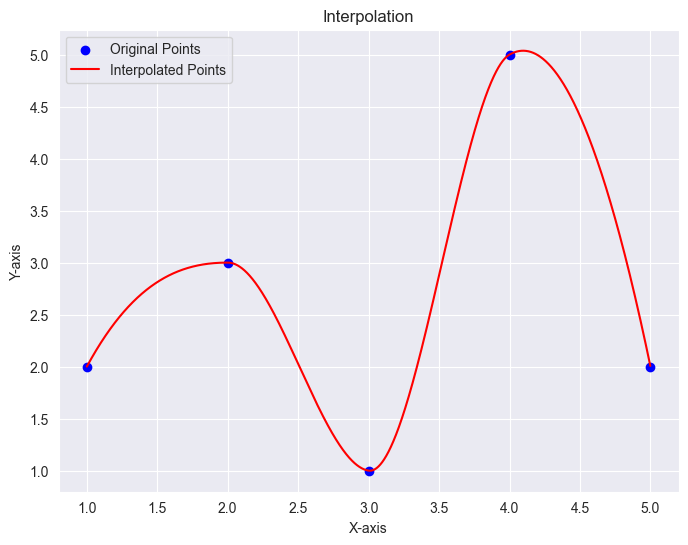

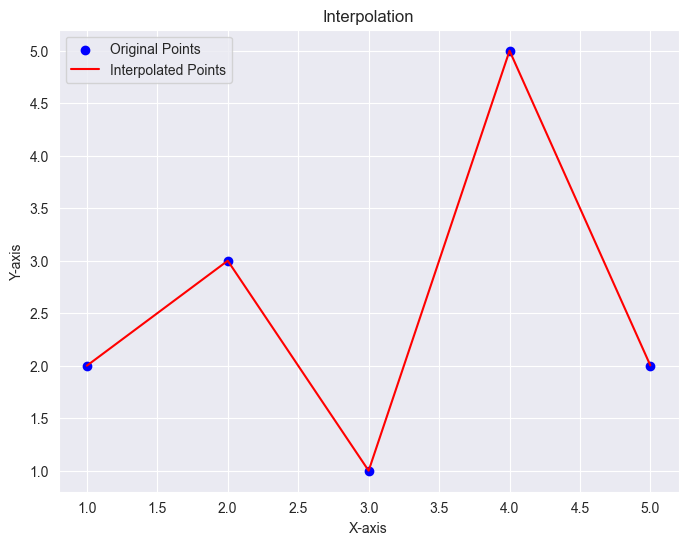

In [2]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print(f"{method.__name__}: {(te - ts) * 1000:.2f}ms")
        return result
    return timed


# Testing Akima spline interpolator and the plot function
def plot_interpolators():
    data_points = [Point(1, 2), Point(2, 3), Point(3, 1), Point(4, 5), Point(5, 2)]
    interpolator = AkimaSplineInterpolator(data_points)
    interpolator.plot()

    interpolator = LinearInterpolator(data_points)
    interpolator = ExtendedInterpolator.from_interpolator(interpolator)
    interpolator.plot()


def test_derivate():
    data_points = [Point(0, 0), Point(1, 1), Point(2, 0)]

    interpolator = LinearInterpolator(data_points)
    interpolator = ExtendedInterpolator.from_interpolator(interpolator)

    x_values = [0.0, 0.5, 1.5]
    expected_derivatives = [1.0, 1.0, -1.0]  # Precomputed derivatives for the given x-values

    for i, x_value in enumerate(x_values):
        assert round(interpolator.derivative(x_value), 6) == round(expected_derivatives[i],
                                                                   6), f"Derivative mismatch at x = {x_value}"

    print("\nDerivative tests passed successfully.")


def test_integral():
    data_points = [Point(0, 0), Point(1, 1), Point(2, -1)]

    interpolator = LinearInterpolator(data_points)
    interpolator = ExtendedInterpolator.from_interpolator(interpolator)

    start_x_values = [0.0, 1.0]
    end_x_values = [1.0, 2.0]
    expected_integrals = [0.5, 0]  # Precomputed integrals for the given x-limits

    for start, end, expected_integral in zip(start_x_values, end_x_values, expected_integrals):
        calculated_integral = interpolator.integral(start, end)
        assert round(calculated_integral, 6) == round(expected_integral,
                                                      6), f"Integral mismatch between x = {start} and {end}"

    print("Integral tests passed successfully.")

@timeit
def execute_interpolation(interpolator, x_values):
    for x_val in x_values:
        interpolator(x_val)

num_points = 1000
points = [Point(x, x * x) for x in range(num_points)]
x_values = np.arange(num_points, dtype=float)
x = np.array([point.x for point in points])
y = np.array([point.y for point in points])

print("Native linear interpolator:")
execute_interpolation(native.LinearInterpolator(points), x_values)
print("\nC++ linear interpolator:")
execute_interpolation(LinearInterpolator(points), x_values)
print("\nScipy linear interpolator:")
execute_interpolation(interp1d(x, y, kind='linear'), x_values)
    
test_derivate()
test_integral()

print("All test successful, now plotting some interpolated functions. ")
plot_interpolators()

size:  235192
Mean: 61964.27098151964
Standard Deviation: 68664.2848769333
Median: 44068.0
Variance: 4714784017.660652
Frequency Count: {'ADANIPORTS': 2299, 'ASIANPAINT': 5306, 'AXISBANK': 3394, 'BAJAJ-AUTO': 3202, 'BAJAJFINSV': 3201, 'BAJAUTOFIN': 2611, 'BAJFINANCE': 2624, 'BHARTI': 1089, 'BHARTIARTL': 3685, 'BPCL': 5306, 'BRITANNIA': 5305, 'CIPLA': 5306, 'COALINDIA': 2598, 'DRREDDY': 5306, 'EICHERMOT': 5301, 'GAIL': 4985, 'GRASIM': 5306, 'HCLTECH': 5300, 'HDFC': 5306, 'HDFCBANK': 5306, 'HEROHONDA': 2898, 'HEROMOTOCO': 2408, 'HINDALC0': 1919, 'HINDALCO': 3387, 'HINDLEVER': 1893, 'HINDUNILVR': 3413, 'ICICIBANK': 5306, 'INDUSINDBK': 4985, 'INFOSYSTCH': 2870, 'INFY': 2436, 'IOC': 5306, 'ITC': 5306, 'JSWSTEEL': 3871, 'JSWSTL': 123, 'KOTAKBANK': 4483, 'KOTAKMAH': 502, 'LT': 4184, 'M&M': 5306, 'MARUTI': 4427, 'MUNDRAPORT': 1023, 'NESTLEIND': 2806, 'NTPC': 4088, 'ONGC': 5306, 'POWERGRID': 3359, 'RELIANCE': 5306, 'SBIN': 5306, 'SESAGOA': 3435, 'SHREECEM': 4985, 'SSLT': 388, 'SUNPHARMA': 5306,

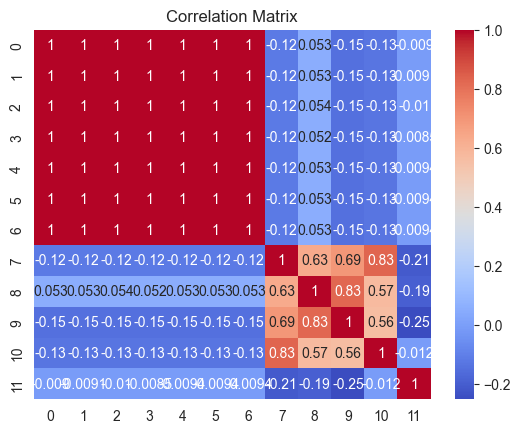

test_custom_dataset_operations: 1860.33ms
Mean: 61964.27098151964
Standard Deviation: 68664.57016208592
Median: 44068.0
Variance: 4714823195.54402
Frequency Count: Symbol
IOC           5306
CIPLA         5306
M&M           5306
ICICIBANK     5306
ONGC          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64


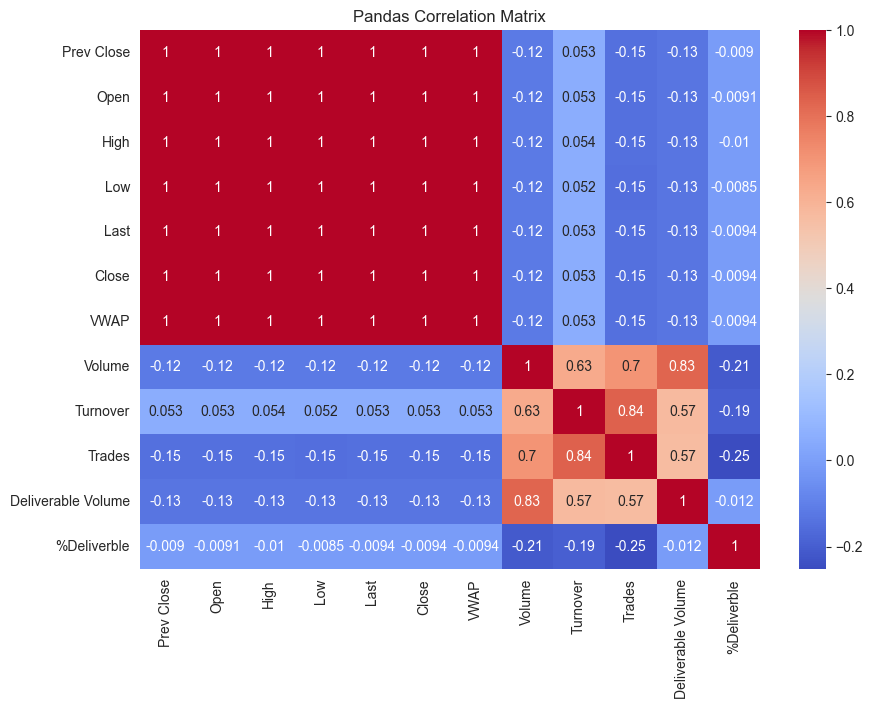

test_pandas_operations: 305.46ms
custom_map_filter: 308.00ms
pandas_map_filter: 17.37ms
Custom Dataset size after filtering: 120344
Pandas DataFrame size after filtering: 120344
First 5 lines of the dataset: 
['2011-06-01', 'MUNDRAPORT', 'EQ', 161.45, 162.1, 165.7, 161.25, 163.5, 164.0, 164.08, 2574106, 42237032995000.0, 38342.0, 1271255.0, 0.4939]
['2011-06-02', 'MUNDRAPORT', 'EQ', 164.0, 164.0, 165.15, 160.15, 161.15, 161.25, 162.17, 1699298, 27556778660000.004, 32352.0, 791462.0, 0.4658]
['2011-06-03', 'MUNDRAPORT', 'EQ', 161.25, 161.5, 162.8, 159.2, 161.0, 161.05, 161.02, 1185817, 19093606125000.0, 29620.0, 722154.0, 0.609]
['2011-06-06', 'MUNDRAPORT', 'EQ', 161.05, 160.5, 161.1, 159.05, 160.0, 159.85, 160.09, 546378, 8746904709999.999, 14142.0, 386144.0, 0.7067]
['2011-06-07', 'MUNDRAPORT', 'EQ', 159.85, 159.85, 162.75, 156.35, 157.0, 157.25, 158.52, 2193466, 34770271165000.0, 35730.0, 1425849.0, 0.65]


In [3]:
# Initialize the custom dataset with a CSV file
csv_file = "NIFTY50_all.csv"
dataset = PyDataset(csv_file)
print("size: ", len(dataset))

# Load the same CSV file using Pandas for comparison
df = pd.read_csv(csv_file)

# Test various statistics methods on custom dataset
column_name = "Trades"

@timeit
def test_custom_dataset_operations():
    print("Mean:", dataset.mean(column_name))
    print("Standard Deviation:", dataset.std_dev(column_name))
    print("Median:", dataset.median(column_name))
    print("Variance:", dataset.variance(column_name))

    if dataset.is_categorical("Symbol"):
        print("Frequency Count:", dataset.frequency_count("Symbol"))

    dataset.display_correlation_matrix()

test_custom_dataset_operations()

# Test similar operations on Pandas DataFrame
@timeit
def test_pandas_operations():
    print("Mean:", df[column_name].mean())
    print("Standard Deviation:", df[column_name].std())
    print("Median:", df[column_name].median())
    print("Variance:", df[column_name].var())

    print("Frequency Count:", df['Symbol'].value_counts())

    # Display the correlation matrix using seaborn
    plt.figure(figsize=(10, 7))
    numerical_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Pandas Correlation Matrix')
    plt.show()

test_pandas_operations()

# Comparing mapping and filtering operations
@timeit
def custom_map_filter():
    # Mapping
    dataset.map_column(column_name, lambda x: x * 2)
    # Filtering
    dataset.filter_rows(column_name, lambda x: x > 0)

custom_map_filter()

@timeit
def pandas_map_filter():
    # Mapping
    df[column_name] = df[column_name] * 2
    # Filtering
    return df[df[column_name] > 0]

df_filtered = pandas_map_filter()

# Print comparison of dataset sizes
print("Custom Dataset size after filtering:", len(dataset))
print("Pandas DataFrame size after filtering:", len(df_filtered))

# Iterating through the dataset
print("First 5 lines of the dataset: ")
for i, row in enumerate(dataset):
    if i == 5: break
    print(row)
